In [36]:
import h5py
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision.transforms as T
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from helper_functions import bin_to_one_hot_index_linear
import datetime
from exceptions import CountException
from torch.utils.data import Dataset, DataLoader
import einops
from load_data import import_data

In [37]:
input_folder = '/media/jan/54093204402DAFBA/Jan/Programming/Butz_AG/weather_data/dwd_datensatz_bits/rv_recalc/RV_RECALC/hdf/'
input_file = 'DE1200_RV_Recalc_20201201_0000_+000000.hdf'
input_path = input_folder + input_file
data_dataset, flag_dataset = import_data(input_path)
data_arr = np.array(data_dataset)
flag_arr = np.array(flag_dataset)

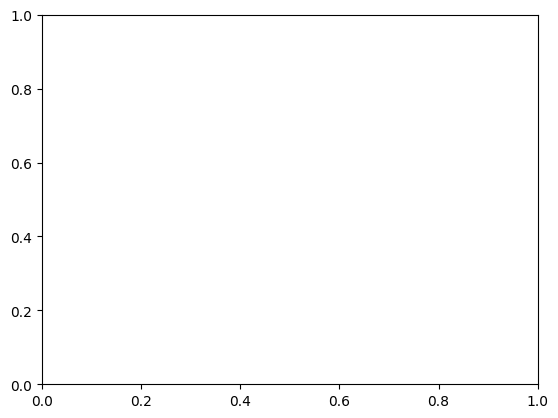

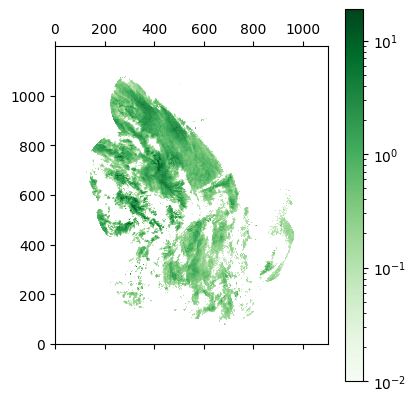

In [44]:
# Log data plot --> negative vals not included (-1e09 for NaN)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# pixel_plot = plt.imshow(data_arr, cmap='Greens', interpolation='nearest', origin='lower')
pixel_plot = plt.matshow(data_arr, cmap='Greens', norm=LogNorm(vmin=0.01, vmax=np.max(data_arr)), interpolation='nearest',
                         origin='lower')
plt.colorbar(pixel_plot)
plt.savefig('../misc/log_data.png', dpi=300, bbox_inches='tight')
plt.show()

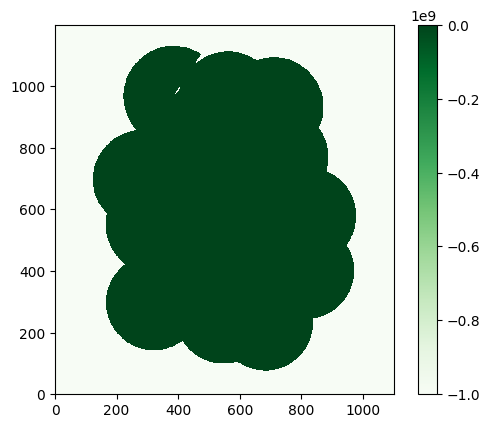

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
pixel_plot = plt.imshow(data_arr, cmap='Greens', interpolation='nearest', origin='lower')
plt.colorbar(pixel_plot)
plt.savefig('../misc/data.png', dpi=300, bbox_inches='tight')
plt.show()

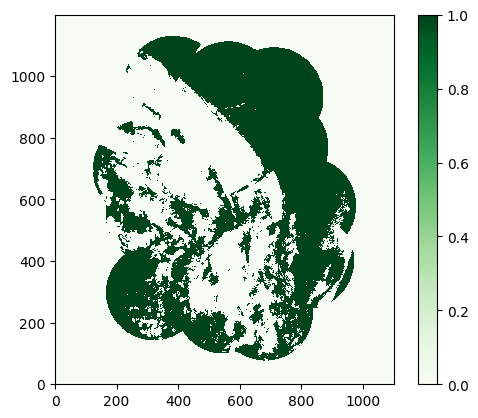

In [43]:
boo_data = (data_arr < 0.001) &  (data_arr > -0.001)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
pixel_plot = plt.imshow(boo_data, cmap='Greens', interpolation='nearest', origin='lower')
plt.colorbar(pixel_plot)
plt.savefig('../misc/all_data_close_zero.png', dpi=300, bbox_inches='tight')
plt.show()

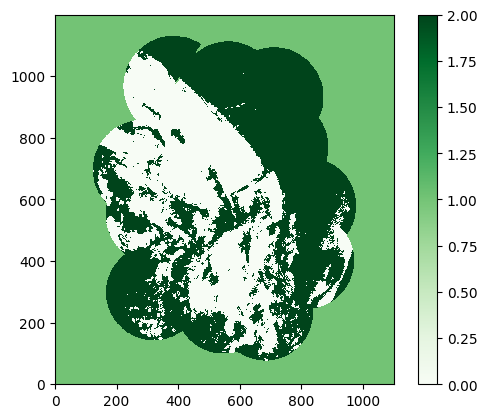

In [41]:
    # Plot flag arr!
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    pixel_plot = plt.imshow(flag_arr, cmap='Greens', interpolation='nearest', origin='lower')
    plt.colorbar(pixel_plot)
    plt.savefig('../misc/flag_data.png', dpi=300, bbox_inches='tight')
    plt.show()